## Assignment 1 — Operators
Course: Quantum Programming <br>
Author: Danis Alukaev <br>
Group: B19-DS-01 <br>
Email: d.alukaev@innopolis.university

# 0. Prerequisites

Let's firstly import all necessary packages that will be used in this notebook.

In [1]:
import numpy as np

from numpy.linalg import inv
from numpy import kron, dot, pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer, transpile
from qiskit.visualization import plot_histogram

# 1. [50] Missing gates

A professor was explaning an algorithm and draw a circuit on the writeboard, but after the lecture one of your classmates erased a few gates in the middle. You were late, so you came to copy the ciruit to your notebook. Now you need to restore the missing gates given:
- empirical distribution (observations), total program matrix, and the statevector.

**Requirements**:
- don't try to guess the gate by substitution. No way. You have to provide a solution.
- solve the problem "with pen and paper" - write your solution in `sympy` of just with pure $\LaTeX$.

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer
from qiskit.visualization import plot_histogram
from numpy import pi

qreg = QuantumRegister(3, 'qubits')
creg = ClassicalRegister(3, 'bits')
qc = QuantumCircuit(qreg, creg)

# set data
qc.ry(pi / 3, qreg[0])
qc.barrier()

#############################
#                           #
#      MISSING PART         #
#                           #
#############################

# entangle
qc.cx(qreg[1], qreg[2])
qc.h(qreg[1])

# disentangle
qc.h(qreg[0])
qc.cx(qreg[0], qreg[1])
qc.h(1)
qc.cx(2, 1)
qc.h([0])

qc.barrier()
qc.measure(qreg, creg)

qc.draw()

```
          ┌─────────┐  ░░░░░░░░░░┌───┐          ┌───┐       ┌─┐      
qubits_0: ┤ Ry(π/3) ├──░░░░░░░░░░┤ H ├───────■──┤ H ├───────┤M├──────
          └─────────┘  ░░░░░░░░░░└───┘┌───┐┌─┴─┐├───┤┌───┐  └╥┘┌─┐   
qubits_1: ─────────────░░░░░░░░░░──■──┤ H ├┤ X ├┤ H ├┤ X ├───╫─┤M├───
                       ░░░░░░░░░░┌─┴─┐└───┘└───┘└───┘└─┬─┘   ║ └╥┘┌─┐
qubits_2: ───────────────────────┤ X ├─────────────────■─────╫──╫─┤M├
                                 └───┘                       ║  ║ └╥┘
  bits: 3/═══════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 
```

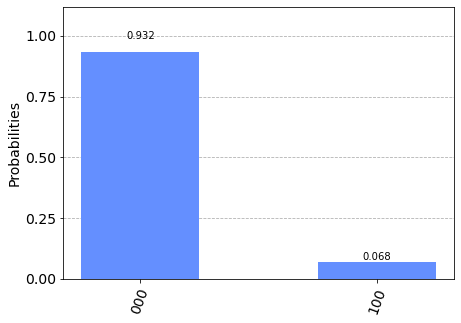

In [22]:
qpu = BasicAer.get_backend('qasm_simulator')
hist = execute(qc, qpu, shots=65535).result().get_counts()
plot_histogram(hist)

In [23]:
import numpy as np
np.set_printoptions(precision=6)
svqpu = BasicAer.get_backend('statevector_simulator')

# cool thing you may want to use when going from one type of simulator to another
qc.remove_final_measurements()
# the result is real-valued. We remain real part just for clarity.
execute(qc, svqpu).result().get_statevector().real

## NB please make sure you understand, 
# that in IBMs world the "2nd" qubit is living in the rightmost position
# which is kind of weird.

array([0.965926, 0.      , 0.      , 0.      , 0.258819, 0.      ,
       0.      , 0.      ])

In [24]:
mxqpu = BasicAer.get_backend('unitary_simulator')
np.set_printoptions(precision=3)
execute(qc, mxqpu).result().get_unitary(qc, decimals=5).real

array([[ 0.966,  0.259,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.259, -0.966,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.259, -0.966,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.966,  0.259],
       [ 0.259, -0.966,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.966,  0.259,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.966,  0.259,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.259, -0.966]])

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
Let me help you with the task )) 

If unknown transformation is called $Q$, we can rewrite the program in matrix form like:

$(Remainder)\times\left(Q\otimes I\right)\times\left( RY(\frac{\pi}{3})\otimes I\otimes I\right)=U$

1. Solve this equation for $Q\otimes I$. Then compute actual matrix using numpy. NB! Matrices are attached in reverse order compared to the gates order.
2. Look at the resulting matrix, can you find $Q$?
3. Now look at $Q$. How it acts on $\ket{00}$? Did we see this operator before? Which primitive gates it consists of?
4. Add missing gates to the program and run to obtain the same result.

### Solution

Let's firstly recall some matrix notations that might be useful for us to represent the program in a matrix form:

| Name | Notation | Matrix |
| :- | :-: | :-: |
| Identity matrix | $$I$$ | $$  \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}$$ |
| Hadamard gate | $$H$$ | $$\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$ |
| Rotate around y-axis gate | $$RY(\theta)$$ | $$ \begin{bmatrix} \cos{\frac{\theta}{2}} & - \sin{\frac{\theta}{2}} \\ \sin{\frac{\theta}{2}} & \cos{\frac{\theta}{2}} \end{bmatrix} $$ |
| Controlled NOT | $$ \text{CNOT} $$ | $$ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ \end{bmatrix} $$|
| Controlled NOT (opposite direction) | $$ \text{CNOT} $$ | $$ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ \end{bmatrix} $$|


For sake of clarity let controlled NOT with controlling qubit $a$ and controlled qubit $b$ be defined as $\text{CNOT}_{\text{ab}}$. Also, note that in qiskit package qubits with lower index are less significant. Thus, we will apply CNOT when $b > a$ and CNOT in opposite direction when $a > b$.

Let's define an unknown transformation as $Q$.

Accordingly, the program can be rewritten in a matrix form as follows:
$$\left(\text{CNOT}_{21} \otimes I \right) \times \left(I \otimes H \otimes H \right) \times \left(I \otimes \text{CNOT}_{01}\right) \times \left(I \otimes H \otimes I \right) \times \left(\text{CNOT}_{12} \otimes H \right) \times \left(I \otimes Q \right) \times \left( I\otimes I \otimes RY(\frac{\pi}{3})\right) = U$$
This equation could be solved for $I \otimes Q$: 
$$ I \otimes Q  = \left( \left(\text{CNOT}_{21} \otimes I \right) \times \left(I \otimes H \otimes H \right) \times \left(I \otimes \text{CNOT}_{01}\right) \times \left(I \otimes H \otimes I \right) \times \left(\text{CNOT}_{12} \otimes H \right) \right)^{-1} \times U \times \left( I\otimes I \otimes RY(\frac{\pi}{3})\right)^{-1}$$

Compute actual matrix $I \otimes Q$ using numpy:

In [2]:
I = np.identity(2)

H = 1 / np.sqrt(2) * np.array([[1, 1], 
                               [1, -1]])

CNOT = np.array([[1, 0, 0, 0], 
                 [0, 1, 0, 0], 
                 [0, 0, 0, 1], 
                 [0, 0, 1, 0]])

CNOT_opposite = np.array([[1, 0, 0, 0], 
                          [0, 0, 0, 1], 
                          [0, 0, 1, 0], 
                          [0, 1, 0, 0]])

Ry = np.array([[np.cos(np.pi / 3 / 2), -np.sin(np.pi / 3 / 2)], 
               [np.sin(np.pi / 3 / 2), np.cos(np.pi / 3 / 2)]])

U = np.array([[ 0.966,  0.259,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
              [ 0.   ,  0.   ,  0.259, -0.966,  0.   ,  0.   ,  0.   ,  0.   ],
              [ 0.   ,  0.   ,  0.   ,  0.   ,  0.259, -0.966,  0.   ,  0.   ],
              [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.966,  0.259],
              [ 0.259, -0.966,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
              [ 0.   ,  0.   ,  0.966,  0.259,  0.   ,  0.   ,  0.   ,  0.   ],
              [ 0.   ,  0.   ,  0.   ,  0.   ,  0.966,  0.259,  0.   ,  0.   ],
              [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.259, -0.966]])

In [3]:
def kron_mg(matrices):
    """Compute Kronecker product of several matrices.
    
    Args:
        matrices: list of numpy arrays
        
    Returns:
        Kronecker product of given matrices
    """
    result = np.copy(matrices[0])
    for idx in range(1, len(matrices)):
        result = kron(result, np.copy(matrices[idx]))
    return result


def dot_mg(matrices):
    """Compute dot product of several matrices.
    
    Args:
        matrices: list of numpy arrays
    
    Returns:
        dot product of given matrices
    """
    result = np.copy(matrices[0])
    for idx in range(1, len(matrices)):
        result = dot(result, np.copy(matrices[idx]))
    return result

In [4]:
IxQ = dot_mg([
    inv(
        dot_mg([
            kron_mg([CNOT, I]),
            kron_mg([I, H, H]),
            kron_mg([I, CNOT_opposite]),
            kron_mg([I, H, I]),
            kron_mg([CNOT_opposite, H])
        ])),
    U,
    inv(kron_mg([I, I, Ry]))
])

Due to computational error there are likely to be some elements of the matrix which values can be neglected. Let $\epsilon = 10 ^ {-10}$ be an absolute value threshold for such elements.

In [5]:
eps = 1e-10
IxQ[abs(IxQ) < eps] = 0
np.set_printoptions(precision=3)
IxQ

array([[ 0.707,  0.707,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.707, -0.707,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.707,  0.707,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.707, -0.707,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.707,  0.707,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.707, -0.707],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.707,  0.707],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.707, -0.707,  0.   ,  0.   ]])

You might notice the pattern of this matrix — upper right and bottom left quadrants are filled with zeros and upper left and bottom right quadrants are the same. This is type of behaviour we expect from Kronecker product of identity matrix and $Q$. Thus, the required matrix $Q$ could be extracted from upper left or bottom right quadrants.

$$ Q = \begin{bmatrix}
0.707 & 0.707 & 0 & 0 \\
0 & 0 & 0.707 & -0.707 \\
0 & 0 & 0.707 & 0.707 \\
0.707 & -0.707 & 0 & 0
\end{bmatrix}$$

Notice that $0.707 \approx \frac{1}{ \sqrt{2} }$.

Let's now carefully examine how it acts for $\ket{00}$, $\ket{01}$, $\ket{10}$, and $\ket{11}$:

$Q \ket{00} = \begin{bmatrix}
0.707 & 0.707 & 0 & 0 \\
0 & 0 & 0.707 & -0.707 \\
0 & 0 & 0.707 & 0.707 \\
0.707 & -0.707 & 0 & 0
\end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} \approx \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} = \frac{\ket{00} + \ket{11}}{\sqrt{2}} = \ket{\Phi^+}$

$Q \ket{01} = \begin{bmatrix}
0.707 & 0.707 & 0 & 0 \\
0 & 0 & 0.707 & -0.707 \\
0 & 0 & 0.707 & 0.707 \\
0.707 & -0.707 & 0 & 0
\end{bmatrix} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \approx \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ -1 \end{bmatrix} = \frac{\ket{00} - \ket{11}}{\sqrt{2}} = \ket{\Phi^-}$

$Q \ket{10} = \begin{bmatrix}
0.707 & 0.707 & 0 & 0 \\
0 & 0 & 0.707 & -0.707 \\
0 & 0 & 0.707 & 0.707 \\
0.707 & -0.707 & 0 & 0
\end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} \approx \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \\ 1 \\ 0 \end{bmatrix} = \frac{\ket{01} + \ket{10}}{\sqrt{2}} = \ket{\Psi ^ +}$

$Q \ket{11} = \begin{bmatrix}
0.707 & 0.707 & 0 & 0 \\
0 & 0 & 0.707 & -0.707 \\
0 & 0 & 0.707 & 0.707 \\
0.707 & -0.707 & 0 & 0
\end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} \approx \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ -1 \\ 1 \\ 0 \end{bmatrix} = \frac{-(\ket{01} - \ket{10})}{\sqrt{2}} = \ket{\Psi ^ -}$


These are four maximally entangled two-qubit Bell states composing Bell basis. On lectures we studied a way to create Bell state using Hadamard and controlled NOT gates. I would suggest that these are two missing gates in a circuit. Let's fill in missing parts in the code and rerun simulations.

In [6]:
qreg = QuantumRegister(3, 'qubits')
creg = ClassicalRegister(3, 'bits')
qc = QuantumCircuit(qreg, creg)

# set data
qc.ry(pi / 3, qreg[0])
qc.barrier()

### FILLED IN MISSING GATES ###

qc.h(qreg[0])
qc.cx(qreg[0], qreg[1])
qc.barrier()

###############################

# entangle
qc.cx(qreg[1], qreg[2])
qc.h(qreg[1])

# disentangle
qc.h(qreg[0])
qc.cx(qreg[0], qreg[1])
qc.h(1)
qc.cx(2, 1)
qc.h([0])

qc.barrier()
qc.measure(qreg, creg)

qc.draw()

┌─────────┐ ░ ┌───┐      ░ ┌───┐          ┌───┐      ░ ┌─┐      
qubits_0: ┤ Ry(π/3) ├─░─┤ H ├──■───░─┤ H ├───────■──┤ H ├──────░─┤M├──────
          └─────────┘ ░ └───┘┌─┴─┐ ░ └───┘┌───┐┌─┴─┐├───┤┌───┐ ░ └╥┘┌─┐   
qubits_1: ────────────░──────┤ X ├─░───■──┤ H ├┤ X ├┤ H ├┤ X ├─░──╫─┤M├───
                      ░      └───┘ ░ ┌─┴─┐└───┘└───┘└───┘└─┬─┘ ░  ║ └╥┘┌─┐
qubits_2: ────────────░────────────░─┤ X ├─────────────────■───░──╫──╫─┤M├
                      ░            ░ └───┘                     ░  ║  ║ └╥┘
  bits: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                                  0  1  2

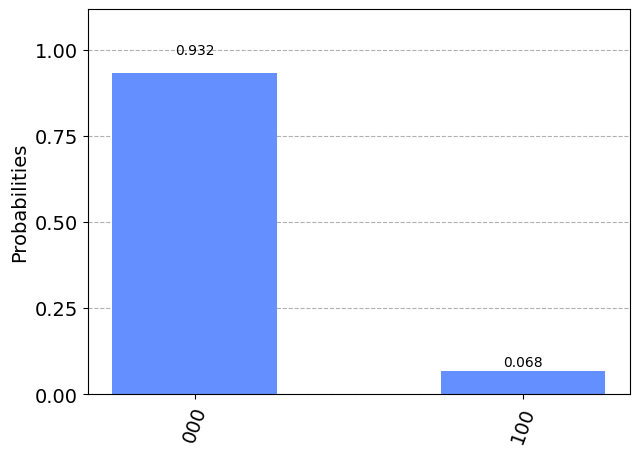

In [8]:
qpu = BasicAer.get_backend('qasm_simulator')
hist = execute(qc, qpu, shots=65535).result().get_counts()
plot_histogram(hist)

In [9]:
np.set_printoptions(precision=6)
svqpu = BasicAer.get_backend('statevector_simulator')

# cool thing you may want to use when going from one type of simulator to another
qc.remove_final_measurements()
# the result is real-valued. We remain real part just for clarity.
execute(qc, svqpu).result().get_statevector().real

## NB please make sure you understand, 
# that in IBMs world the "2nd" qubit is living in the rightmost position
# which is kind of weird.

array([0.965926, 0.      , 0.      , 0.      , 0.258819, 0.      ,
       0.      , 0.      ])

In [10]:
mxqpu = BasicAer.get_backend('unitary_simulator')
np.set_printoptions(precision=3)
execute(qc, mxqpu).result().get_unitary(qc, decimals=5).real

array([[ 0.966,  0.259,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.259, -0.966,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.259, -0.966,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.966,  0.259],
       [ 0.259, -0.966,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.966,  0.259,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.966,  0.259,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.259, -0.966]])

As you might see, emperical distribution, statevector and unitary matrix match the reference given in problem statement. Therefore, the missing gates are Hadamard and controlled NOT.

# 2. [50] Invent a CRY($\frac{\pi}{2}$) gate

Assume you have only arbitrary 1-qubit gates + $CNOT$. How to construct $CRY$ gate of them?

Base your solution on [this classical paper](https://arxiv.org/abs/quant-ph/0406176), pay attention to: formula 13 (what is multiplexor) and **chapter 3.1**. It explicitly says what you should do.

**Provide both code and justification!**

HINT: $CRY(\phi)$ is a multiplexor $I\oplus RY(\phi) = RY(0)\oplus RY(\phi)$

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer, transpile
from qiskit.visualization import plot_histogram
from numpy import pi

qreg = QuantumRegister(2, 'qubits')
creg = ClassicalRegister(2, 'bits')
qc = QuantumCircuit(qreg, creg)

qc.h(0)
qc.cry(np.pi/2, 0, 1)

display(qc.draw())

import numpy as np
np.set_printoptions(precision=5)
svqpu = BasicAer.get_backend('statevector_simulator')
execute(qc, svqpu).result().get_statevector().real

┌───┐           
qubits_0: ┤ H ├─────■─────
          └───┘┌────┴────┐
qubits_1: ─────┤ Ry(π/2) ├
               └─────────┘
  bits: 2/════════════════

array([0.70711, 0.5    , 0.     , 0.5    ])

### Solution

Shende V. et al. in _"Synthesis of Quantum Logic Circuits"_ define multiplexor as a circuit block implementing a quantum conditional. For a multiplexor with a single select bit that is most significant, its matrix $U$ is block diagonal, where $U_0$ and $U_1$ are applied according to value of select bit:
$$ U = U_0 \oplus U_1 = \begin{bmatrix} U_0 & \\ & U_1 \end{bmatrix}$$


Notice that $CRY(\phi)$ gate is a multiplexor $I\oplus RY(\phi) = RY(0)\oplus RY(\phi)$.

In the chapter 3.1 authors show an example of multiplexor $RZ(\theta_0) \oplus RZ(\theta_1)$ implemented by a circuit of four consecutive gates: $RZ(\frac{\theta_0 + \theta_1}{2})$, $\text{CNOT}_{01}$, $RZ(\frac{\theta_0 - \theta_1}{2})$, and $\text{CNOT}_{01}$. They also claim that this statement holds if we replace $RZ$ by $RY$, which is exactly our case.

Thus, the circuit implementing $CRY(\phi)$ should consist of $RY(\frac{0 + \phi}{2})=RY(\frac{\phi}{2})$, $\text{CNOT}_{01}$, $RY(\frac{0 - \phi}{2})=RY(-\frac{ \phi}{2})$, and $\text{CNOT}_{01}$, where $\phi = \frac{\pi}{2}$ in the code. 

In [12]:
qreg = QuantumRegister(2, 'qubits')
creg = ClassicalRegister(2, 'bits')
qc = QuantumCircuit(qreg, creg)

qc.h(0)

### IMPLEMENTATION OF CRY GATE ###

qc.barrier()
phi = np.pi / 4
qc.ry(phi, qreg[1])
qc.cx(qreg[0], qreg[1])
qc.ry(-phi, qreg[1])
qc.cx(qreg[0], qreg[1])
qc.barrier()
display(qc.draw())

##################################

import numpy as np
np.set_printoptions(precision=5)
svqpu = BasicAer.get_backend('statevector_simulator')
execute(qc, svqpu).result().get_statevector().real

┌───┐ ░                                   ░ 
qubits_0: ┤ H ├─░──────────────■────────────────■───░─
          └───┘ ░ ┌─────────┐┌─┴─┐┌──────────┐┌─┴─┐ ░ 
qubits_1: ──────░─┤ Ry(π/4) ├┤ X ├┤ Ry(-π/4) ├┤ X ├─░─
                ░ └─────────┘└───┘└──────────┘└───┘ ░ 
  bits: 2/════════════════════════════════════════════

array([0.70711, 0.5    , 0.     , 0.5    ])

State vector matches reference value, so we managed to replicate $CRY$ gate!